In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from jax import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
from flow import RealNVP, create_two_spirals_data

In [21]:
def plot_generated_samples(n_plot_samples,data,n_paired_transforms,n_samples,epochs,lr, on_top_original=False):
    result_dir = f'../models/{data}_ntransform_{n_paired_transforms}_samples_{n_samples}_epochs_{epochs}_lr_{lr:.0e}'
    original_samples = create_two_spirals_data(n_samples,noise=noise_std)
    original_samples = torch.FloatTensor(StandardScaler().fit_transform(original_samples))
    fig, ax = plt.subplots(2, 2, figsize=(10,7))
    
    model = RealNVP(n_paired_transforms,2); model.load_state_dict(torch.load(result_dir + '/model_chkpnt_1'))
    z = torch.randn((n_plot_samples,2),dtype=torch.float32)
    with torch.no_grad():
        x = model.backward(z)
    if on_top_original:
        ax[0,0].scatter(original_samples[:,0],original_samples[:,1],s=10)
    ax[0,0].scatter(x[:,0],x[:,1],s=10)
    ax[0,0].set_title('Checkpoint 1')

    model = RealNVP(n_paired_transforms,2); model.load_state_dict(torch.load(result_dir + '/model_chkpnt_2'))
    z = torch.randn((n_plot_samples,2),dtype=torch.float32)
    with torch.no_grad():
        x = model.backward(z)
    if on_top_original:
        ax[0,1].scatter(original_samples[:,0],original_samples[:,1],s=10)
    ax[0,1].scatter(x[:,0],x[:,1],s=10)
    ax[0,1].set_title('Checkpoint 2')

    model = RealNVP(n_paired_transforms,2); model.load_state_dict(torch.load(result_dir + '/model_chkpnt_3'))
    z = torch.randn((n_plot_samples,2),dtype=torch.float32)
    with torch.no_grad():
        x = model.backward(z)
    if on_top_original:
        ax[1,0].scatter(original_samples[:,0],original_samples[:,1],s=10)
    ax[1,0].scatter(x[:,0],x[:,1],s=10)
    ax[1,0].set_title('Checkpoint 3')
    
    model = RealNVP(n_paired_transforms,2); model.load_state_dict(torch.load(result_dir + '/model_chkpnt_4'))
    z = torch.randn((n_plot_samples,2),dtype=torch.float32)
    with torch.no_grad():
        x = model.backward(z)
    if on_top_original:
        ax[1,1].scatter(original_samples[:,0],original_samples[:,1],s=10)
    ax[1,1].scatter(x[:,0],x[:,1],s=10)
    ax[1,1].set_title('Checkpoint 4')

def plot_final_generated_samples(n_plot_samples,data,n_paired_transforms,n_samples,epochs,lr,on_top_original=False):
    result_dir = f'../models/{data}_ntransform_{n_paired_transforms}_samples_{n_samples}_epochs_{epochs}_lr_{lr:.0e}'
    original_samples = create_two_spirals_data(n_samples,noise=noise_std)
    original_samples = torch.FloatTensor(StandardScaler().fit_transform(original_samples))

    model = RealNVP(n_paired_transforms,2); model.load_state_dict(torch.load(result_dir + '/model_chkpnt_4'))
    z = torch.randn((n_plot_samples,2),dtype=torch.float32)
    with torch.no_grad():
        x = model.backward(z)
    plt.figure()
    if on_top_original:
        plt.scatter(original_samples[:,0],original_samples[:,1],s=10)
    plt.scatter(x[:,0],x[:,1],s=10)
        
def plot_train_samples(n_plot_samples,noise_std):
    X = create_two_spirals_data(n_plot_samples,noise=noise_std)
    X = torch.FloatTensor(StandardScaler().fit_transform(X))
    plt.scatter(X[:,0],X[:,1],s=10)
    plt.title('Original Training Data')

def plot_losses(data,n_paired_transforms,n_samples,epochs,lr):
    result_dir = f'../models/{data}_ntransform_{n_paired_transforms}_samples_{n_samples}_epochs_{epochs}_lr_{lr:.0e}'
    train_loss = torch.load(result_dir + '/train_loss')
    eval_loss = torch.load(result_dir + '/eval_loss')
    plt.figure()
    plt.plot(np.arange(epochs),train_loss,label='train loss')
    plt.plot(np.arange(epochs),eval_loss,label='test loss')
    plt.legend()
    plt.show()

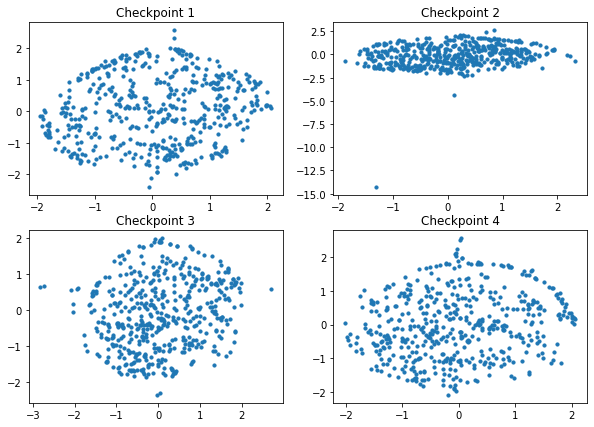

In [25]:
data = 'spiral'
n_paired_transforms = 2
n_mlp_layers = 2
n_samples = int(2e4)
noise_std = 0
epochs = int(5e3)
lr = 1e-3

data+=f'{noise_std:.0e}'
plot_generated_samples(500,data,n_paired_transforms,n_samples,epochs,lr,on_top_original=False)

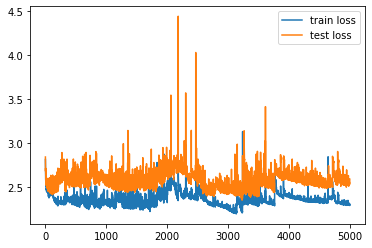

In [7]:
data = 'spiral'
n_paired_transforms = 2
n_mlp_layers = 2
n_samples = int(2e4)
noise_std = 0
epochs = int(5e3)
lr = 1e-3

data+=f'{noise_std:.0e}'
plot_losses(data,n_paired_transforms,n_samples,epochs,lr)